In [1]:
#Import the needed Packages
import pandas as pd
import numpy as np
import control as cn
import matplotlib.pyplot as plt
# Matplotlib inline magic
%matplotlib inline
from Algorithms import cm2in, TUBScolorscale, Integral_Identification
# Plot width and heigth in cm
plot_width = 19.
plot_height = 7.5

In [6]:
# Define a FOTD System
def FOTD(K,T,L,u,t):
    if T <0:
        T = 1e-10
    # New Array for Output
    y = np.zeros_like(u)
    for i in range(0,len(u)):
        if t[i]>=L:
            y[i] = K*(1-np.exp(-(t[i]-L)/T))*u[i]
    return y   

(1.0, 9.399999999999999, 8)
(1.0, -62.0, 90)


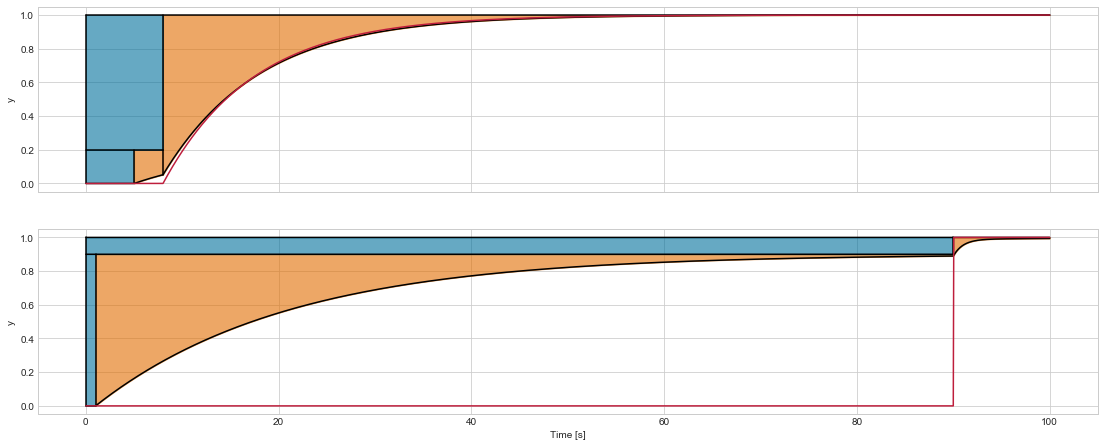

In [28]:
# Make a plot
plt.clf()
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(2,figsize=(plot_width,plot_height), sharex = True)
# Good example
K1,K2,T1,T2,L1,L2 = 0.2,0.8,10,10,5,8
t = np.linspace(0,100,2000)
u = np.ones_like(t)
y1 = FOTD(K1,T1,L1,u,t)
y1inf = K1*np.ones_like(t)
y2 = FOTD(K2,T2,L2,u,t)
y2 = y1+y2
y2inf = (K1+K2)*np.ones_like(t)
KM = K1+K2
LM = np.max([L1,L2])
TM = 1/KM*(K1*(T1+L1)+K2*(T2+L2))-LM
print(KM,TM,LM)

ymodel = FOTD(KM,TM,LM,u,t)

# Make a plot
plt.clf()
plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-whitegrid')

fig, ax = plt.subplots(2,figsize=(plot_width,plot_height), sharex = True)
# Plot the result
ax[0].plot(t,y2, color = TUBScolorscale[0])
ax[0].plot(t[np.where(t<L2)],y1inf[np.where(t<L2)], color = TUBScolorscale[0])
ax[0].plot(t,y2inf, color = TUBScolorscale[0])
ax[0].plot((0,0),(0,K1+K2),color=TUBScolorscale[0])
ax[0].plot((L1,L1),(0,K1),color=TUBScolorscale[0])
ax[0].plot((L2,L2),(y2[np.where(t<L2)][-1],K1),color=TUBScolorscale[0])
ax[0].plot((L2,L2),(K1,K1+K2), color = TUBScolorscale[0])
ax[0].plot(t,ymodel,color = TUBScolorscale[1])
# Fill
ax[0].fill_between(t[np.where(t<=L1)],y1inf[np.where(t<=L1)],y2[np.where(t<=L1)], color = TUBScolorscale[9], alpha = 0.6)
ax[0].fill_between(t[np.where((t>L1)&(t<L2))],y1[np.where((t>L1)&(t<L2))],y1inf[np.where((t>L1)&(t<L2))], color = TUBScolorscale[3], alpha = 0.6)
ax[0].fill_between(t[np.where(t>=L2)],y2inf[np.where(t>=L2)],y2[np.where(t>=L2)], color = TUBScolorscale[3], alpha = 0.6)
ax[0].fill_between(t[np.where(t<L2)],y2inf[np.where(t<L2)],y1inf[np.where(t<L2)], color = TUBScolorscale[9], alpha = 0.6)
ax[0].set_ylabel('y')
# Bad Example
K1,K2,T1,T2,L1,L2 = 0.9,0.1,20,1,1,90
y1 = FOTD(K1,T1,L1,u,t)
y1inf = K1*np.ones_like(t)
y2 = FOTD(K2,T2,L2,u,t)
y2 = y1+y2
y2inf = (K1+K2)*np.ones_like(t)
KM = K1+K2
LM = np.max([L1,L2])
TM = 1/KM*(K1*(T1+L1)+K2*(T2+L2))-LM
print(KM,TM,LM)
ymodel = FOTD(KM,TM,LM,u,t)

# Plot the result
ax[1].plot(t,y2, color = TUBScolorscale[0])
ax[1].plot(t[np.where(t<L2)],y1inf[np.where(t<L2)], color = TUBScolorscale[0])
ax[1].plot(t,y2inf, color = TUBScolorscale[0])
ax[1].plot((0,0),(0,K1+K2),color=TUBScolorscale[0])
ax[1].plot((L1,L1),(0,K1),color=TUBScolorscale[0])
ax[1].plot((L2,L2),(K1,K1+K2), color = TUBScolorscale[0])
ax[1].plot(t,ymodel,color = TUBScolorscale[1])
# Fill
ax[1].fill_between(t[np.where(t<=L1)],y1inf[np.where(t<=L1)],y2[np.where(t<=L1)], color = TUBScolorscale[9], alpha = 0.6)
ax[1].fill_between(t[np.where((t>L1)&(t<L2))],y1inf[np.where((t>L1)&(t<L2))],y2[np.where((t>L1)&(t<L2))], color = TUBScolorscale[3], alpha = 0.6)
ax[1].fill_between(t[np.where(t>=L2)],y2inf[np.where(t>=L2)],y2[np.where(t>=L2)], color = TUBScolorscale[3], alpha = 0.6)
ax[1].fill_between(t[np.where(t<L2)],y2inf[np.where(t<L2)],y1inf[np.where(t<L2)], color = TUBScolorscale[9], alpha = 0.6)

# Titles
plt.ylabel('y')
plt.xlabel('Time [s]')
ax[0].grid(True)
plt.show()

In [4]:
ax[1]